# Installa librerie

In [ ]:
!pip3 install numpy pandas matplotlib

# Import delle librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configurazione

In [1]:
NUM_SIMULAZIONI = 100  # Numero di simulazioni
NUM_CICLI = 2000  # Numero massimo di cicli per simulazione
BANKROLL_INIZIALE = 1580  # Bankroll iniziale
PUNTATE = [5, 10, 20, 40, 80]  # Progressione di puntate
QUOTE_MINIME = [3.5, 3.25, 3.3, 3.5, 3.5]  # Quote minime richieste per vincere
# PROBABILITA_VINCITA = [1 / quota for quota in QUOTE_MINIME]  # Probabilità di vincita
PROBABILITA_VINCITA = [0.3, 0.3, 0.3, 0.3, 0.3]  # Probabilità di vincita
GOAL = BANKROLL_INIZIALE*2

# Simula

In [48]:
def simula_cicli():
    bankroll = BANKROLL_INIZIALE
    storico_bankroll = [bankroll]
    cicli_vinti = 0  # Numero di cicli vinti
    cicli_persi = 0  # Numero di cicli persi
    dettagli_giocata = []  # Lista per raccogliere i dettagli di ogni giocata
    ha_raggiunto_goal = False  # Flag per determinare se il GOAL è stato raggiunto
    ha_esaurito_bankroll = False  # Flag per determinare se il bankroll è esaurito

    for ciclo in range(NUM_CICLI):
        puntata_corrente = 0  # Iniziamo sempre dal primo importo della progressione
        perdite_consecutive = 0  # Contatore delle perdite consecutive
        ciclo_vinto = False  # Flag per determinare se il ciclo è vinto o perso
        puntate_perse_totali = 0  # Somma di tutte le puntate perse fino al momento

        for scommessa_numero in range(len(PUNTATE)):

            if puntata_corrente >= len(PUNTATE):  # Se puntata_corrente supera la lunghezza della lista
                break  # Interrompi il ciclo (anche se non dovremmo mai arrivare a questo punto)

            if bankroll > GOAL:
               ha_raggiunto_goal = True
               break  # Se il bankroll supera il GOAL, terminiamo la simulazione

            if bankroll <= 0:
                ha_esaurito_bankroll = True
                break  # Se il bankroll è esaurito, terminiamo la simulazione
                
            importo_scommessa = PUNTATE[puntata_corrente]
            quota_minima = QUOTE_MINIME[puntata_corrente]

            if bankroll < importo_scommessa:
                ha_esaurito_bankroll = True
                break  # Se non ci sono abbastanza fondi, interrompiamo il ciclo

            # Simula la scommessa
            bankroll -= importo_scommessa
            vincita = 0
            netto = 0
            vinta = False

            if np.random.rand() < PROBABILITA_VINCITA[puntata_corrente]:
                # Vincita
                vincita = (importo_scommessa * quota_minima)  # Vincita totale (importo scommesso * quota)
                bankroll += vincita  # Aggiungi la vincita al bankroll
                vinta = True
                perdite_consecutive = 0  # Reset delle perdite consecutive

                # Aggiungi i dettagli della giocata alla lista
                dettagli_giocata.append({
                    'Ciclo N': ciclo + 1,
                    'Scommessa N': scommessa_numero + 1,
                    'Puntata': importo_scommessa,
                    'Quota': quota_minima,
                    'Vincita': vincita,
                    'Netto': vincita - importo_scommessa,  # Solo la differenza tra vincita e puntata
                    'Vinta?': 'Sì',
                    'Bankroll': bankroll
                })

                # Se il ciclo è vinto, passiamo al prossimo ciclo
                cicli_vinti += 1
                break  # Fine del ciclo dopo una vincita

            else:
                # Perdita
                perdite_consecutive += 1
                puntate_perse_totali += importo_scommessa  # Aggiungi la puntata alla somma delle perdite
                if perdite_consecutive >= len(PUNTATE):
                    cicli_persi += 1
                    break  # Concludi il ciclo con una perdita

                # In caso di perdita, raddoppiamo la puntata (ma non oltre la sesta)
                if puntata_corrente < len(PUNTATE):
                    puntata_corrente += 1
                else:
                    break  # Se siamo all'ultima puntata della progressione, fermiamoci

                # Aggiungi i dettagli della giocata alla lista
                dettagli_giocata.append({
                    'Ciclo N': ciclo + 1,
                    'Scommessa N': scommessa_numero + 1,
                    'Puntata': importo_scommessa,
                    'Quota': quota_minima,
                    'Vincita': vincita,
                    'Netto': netto,
                    'Vinta?': 'No',
                    'Bankroll': bankroll
                })

        storico_bankroll.append(bankroll)

    return storico_bankroll, cicli_vinti, cicli_persi, ha_raggiunto_goal, ha_esaurito_bankroll, dettagli_giocata

# Esegui la simulazione
risultati = []
simulazioni_raggiunto_goal = 0
simulazioni_esaurito_bankroll = 0
tutte_le_giochi = []  # Lista per raccogliere tutte le giocate di tutte le simulazioni
for sim_id in range(NUM_SIMULAZIONI):  # Usa un identificatore per la simulazione
    storico, cicli_vinti, cicli_persi, ha_raggiunto_goal, ha_esaurito_bankroll, dettagli_giocata = simula_cicli()
    
    risultati.append({
        "storico": storico,
        "cicli_vinti": cicli_vinti,
        "cicli_persi": cicli_persi,
        "bankroll_finale": storico[-1],
        "profitto_perdita": storico[-1] - BANKROLL_INIZIALE,
    })
    
    # Aggiungi un campo per l'ID della simulazione a ogni giocata
    for giocata in dettagli_giocata:
        giocata["id_simulazione"] = sim_id  # Assegna un ID alla simulazione
    
    tutte_le_giochi.extend(dettagli_giocata)  # Aggiungi le giocate alla lista globale

    # Conta quante simulazioni hanno raggiunto il goal o esaurito il bankroll
    if ha_raggiunto_goal:
        simulazioni_raggiunto_goal += 1
    elif ha_esaurito_bankroll:
        simulazioni_esaurito_bankroll += 1

# Mostra grafico delle simulazioni

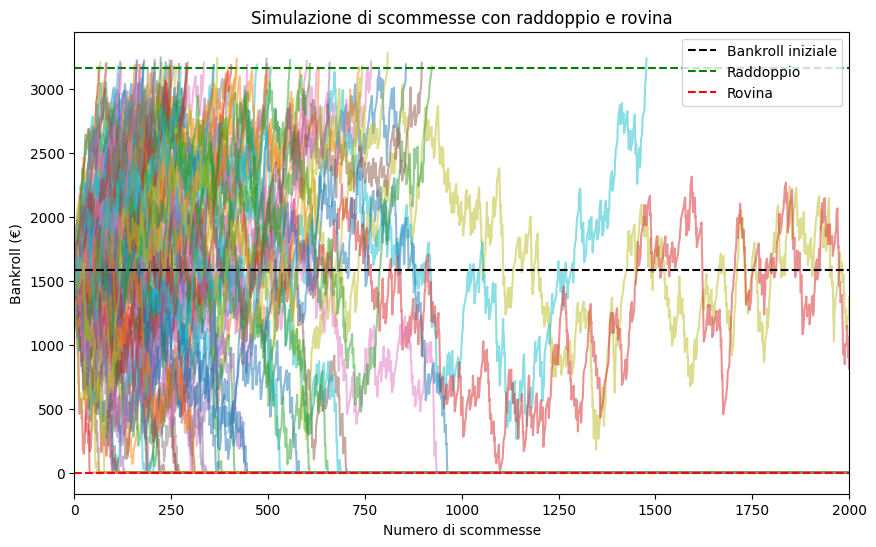

In [49]:
def tronca_storico(storico, goal):
    """Taglia lo storico alla prima volta che il bankroll raggiunge il goal o la rovina."""
    for i, valore in enumerate(storico):
        if valore >= goal or valore <= 0:
            return storico[: i + 1]  # Ritorna solo la parte utile
    return storico  # Se non ha raggiunto il goal o la rovina, lo lascia intatto

# Applica la funzione a tutte le simulazioni
for risultato in risultati:
    risultato["storico"] = tronca_storico(risultato["storico"], GOAL)

# Ora calcoliamo il massimo numero di cicli effettivi
max_cicli = max(len(risultato["storico"]) for risultato in risultati)

# Genera il grafico
plt.figure(figsize=(10, 6))

for risultato in risultati:
    plt.plot(range(len(risultato["storico"])), risultato["storico"], alpha=0.5)

plt.axhline(BANKROLL_INIZIALE, color="black", linestyle="--", label="Bankroll iniziale")
plt.axhline(GOAL, color="green", linestyle="--", label="Raddoppio")
plt.axhline(0, color="red", linestyle="--", label="Rovina")

plt.xlim(0, max_cicli)  # Imposta il limite massimo dell'asse X

plt.xlabel("Numero di scommesse")
plt.ylabel("Bankroll (€)")
plt.title("Simulazione di scommesse con raddoppio e rovina")
plt.legend()
plt.show()


# Mostra il riepilogo delle simulazioni

In [50]:
print(f"*******")
print("\nRiepilogo delle simulazioni:")
print(f"Simulazioni che hanno raggiunto il GOAL: {simulazioni_raggiunto_goal}")
print(f"Simulazioni che hanno esaurito il bankroll: {simulazioni_esaurito_bankroll}")
print(f"*******")

*******

Riepilogo delle simulazioni:
Simulazioni che hanno raggiunto il GOAL: 63
Simulazioni che hanno esaurito il bankroll: 36
*******


# Stampa tutte le giocate di una determinata simulazione

In [51]:
simulazione_id = 1  # Cambia con l'ID della simulazione che vuoi vedere

df = pd.DataFrame(tutte_le_giochi)

df_filtrato = df[df["id_simulazione"] == simulazione_id]
from IPython.display import display
pd.set_option('display.max_rows', None)  # Nessun limite al numero di righe
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.expand_frame_repr', False)  # Evita la troncatura delle colonne
pd.set_option('display.max_colwidth', None)  # Evita la troncatura del testo nelle celle

display(df_filtrato)

,Ciclo N,Scommessa N,Puntata,Quota,Vincita,Netto,Vinta?,Bankroll,id_simulazione
482,1,1,5,3.50,17.5,12.5,Sì,1592.5,1
483,2,1,5,3.50,17.5,12.5,Sì,1605.0,1
484,3,1,5,3.50,0.0,0.0,No,1600.0,1
485,3,2,10,3.25,0.0,0.0,No,1590.0,1
486,3,3,20,3.30,66.0,46.0,Sì,1636.0,1
487,4,1,5,3.50,17.5,12.5,Sì,1648.5,1
488,5,1,5,3.50,0.0,0.0,No,1643.5,1
489,5,2,10,3.25,32.5,22.5,Sì,1666.0,1
490,6,1,5,3.50,0.0,0.0,No,1661.0,1
491,6,2,10,3.25,32.5,22.5,Sì,1683.5,1


# Riassunto delle simulazioni

In [41]:
print(f"*******")

df_riassuntivo = pd.DataFrame(df_filtrato)
print(df_riassuntivo.to_string(index=False))

# Calcolo delle simulazioni con profitto
simulazioni_con_profitto = sum(1 for r in risultati if r["profitto_perdita"] > 0)
totale_simulazioni = len(risultati)
percentuale_profitto = (simulazioni_con_profitto / totale_simulazioni) * 100

# Stampa del risultato
print(f"\nPercentuale di simulazioni con profitto: {percentuale_profitto:.2f}%")

print(f"*******")

*******
 Ciclo N  Scommessa N  Puntata  Quota  Vincita  Netto Vinta?  Bankroll  id_simulazione
       1            1        5   3.50     17.5   12.5     Sì    1592.5               1
       2            1        5   3.50      0.0    0.0     No    1587.5               1
       2            2       10   3.25      0.0    0.0     No    1577.5               1
       2            3       20   3.30     66.0   46.0     Sì    1623.5               1
       3            1        5   3.50      0.0    0.0     No    1618.5               1
       3            2       10   3.25      0.0    0.0     No    1608.5               1
       3            3       20   3.30     66.0   46.0     Sì    1654.5               1
       4            1        5   3.50      0.0    0.0     No    1649.5               1
       4            2       10   3.25      0.0    0.0     No    1639.5               1
       4            3       20   3.30      0.0    0.0     No    1619.5               1
       4            4       40   3.